### Perguntas para responder:
- Qual é a média das notas dos livros?
- Quais autores têm os livros mais bem avaliados?
- Qual é a distribuição de preços dos livros?
- Existem outliers nas classificações ou nos preços dos livros?

## 1. Carregando Bibliotecas

In [174]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregando DataSet

In [175]:
data = pd.read_csv('data/BestSellerBooksofAmazon.csv')
data.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00


In [176]:
data = data.drop_duplicates(subset=['Book Name', 'Author Name'])

## 3. Conversão de Moeda

In [177]:
# Definir taxa de câmbio atual
taxa_cambio = 0.062

# Remover a vírgula e o símbolo de moeda da coluna 'Price' e converter para tipo númerico (float)
data['Price'] = data['Price'].str.replace(',', '').str.replace('₹', '').astype(float)

# Converter de INR para BRL
data['Price_BRL'] = data['Price'] * taxa_cambio

# Arredondar os valores para duas casas decimais
data['Price_BRL'] = data['Price_BRL'].round(2)

# Exibir 
data.head()

,Book Name,Author Name,Rating,Price,Price_BRL
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,239.0,14.82
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,299.0,18.54
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,476.0,29.51
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,399.0,24.74
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,209.0,12.96


## 4. Analise dos dados

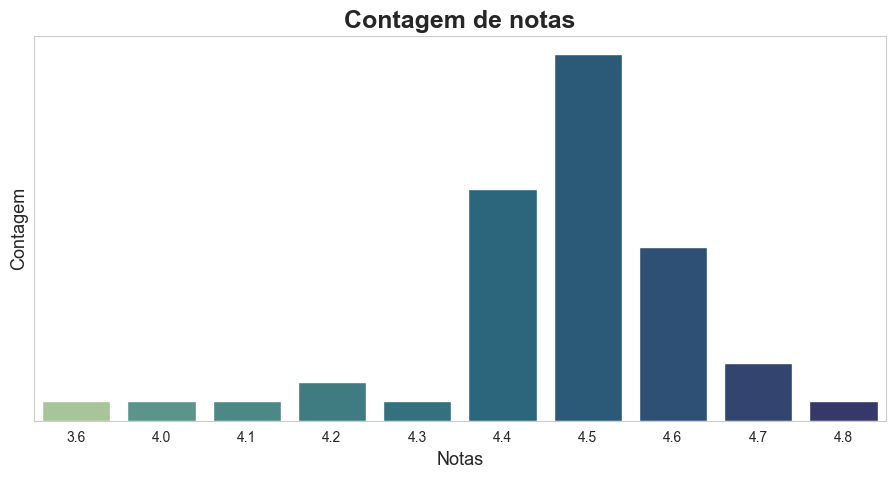

In [192]:
# Qual é a média das notas dos livros?

# Criar o gráfico de barras
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='Rating', data=data, hue='Rating', palette='crest')
ax.set_title('Contagem de notas', weight="bold", fontsize=18)
ax.set_xlabel('Notas', fontsize=13)
ax.set_ylabel('Contagem', fontsize=13)
ax.set_yticks([])
ax.legend_.remove()

Text(0, 0.5, 'Autores')

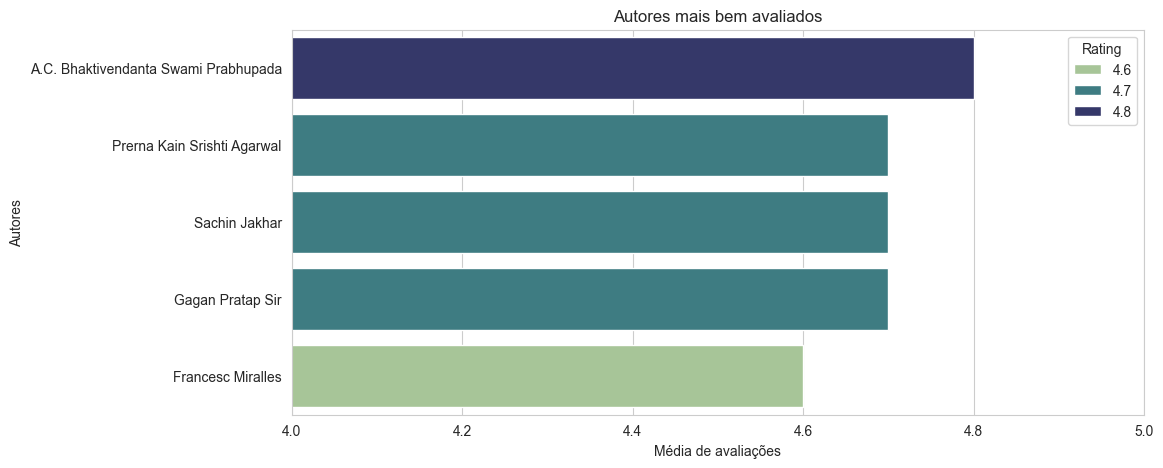

In [198]:
# Quais autores têm os livros mais bem avaliados?

# Média das avaliações por autor
media_avaliacoes = data.groupby('Author Name')['Rating'].mean().sort_values(ascending=False).reset_index()

# Grafico de barras 

plt.figure(figsize=(11, 5))
ax = sns.barplot(x='Rating', y='Author Name', data=media_avaliacoes.head(5), palette='crest', hue='Rating')
ax.set_xlim(4, 5)
ax.set_title('Autores mais bem avaliados')
ax.set_xlabel('Média de avaliações')
ax.set_ylabel('Autores')


In [199]:
# Nomes dos livros mais bem avaliados desses autores

top_books=data[data['Author Name'].isin(media_avaliacoes.head(5)['Author Name'])].groupby('Author Name')['Rating'].idxmax()

top_books_df = pd.DataFrame({
  'Author Name': top_books.index,
  'Book Name': top_books.index
})

top_books_df.reset_index(drop=True, inplace=True)

print(top_books_df)

                            Author Name                             Book Name
0  A.C. Bhaktivendanta Swami Prabhupada  A.C. Bhaktivendanta Swami Prabhupada
1                     Francesc Miralles                     Francesc Miralles
2                      Gagan Pratap Sir                      Gagan Pratap Sir
3           Prerna Kain Srishti Agarwal           Prerna Kain Srishti Agarwal
4                         Sachin Jakhar                         Sachin Jakhar


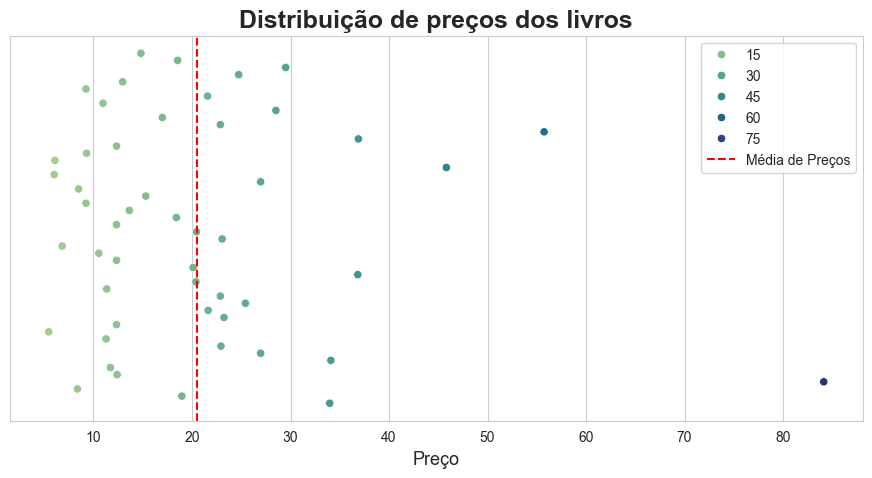

In [197]:
# Qual é a distribuição de preços dos livros?

plt.figure(figsize=(11, 5))
ax = sns.scatterplot(x='Price_BRL', y='Book Name', data=data, hue='Price_BRL', palette='crest')
ax.set_title('Distribuição de preços dos livros', weight="bold", fontsize=18)
ax.set_xlabel('Preço', fontsize=13)
ax.set_ylabel('')
ax.set_yticks([])

# Marcar a média com uma linha vertical

ax.axvline(data['Price_BRL'].mean(), color='red', linestyle='--', label='Média de Preços')
plt.legend()


Text(0, 0.5, 'Preços')

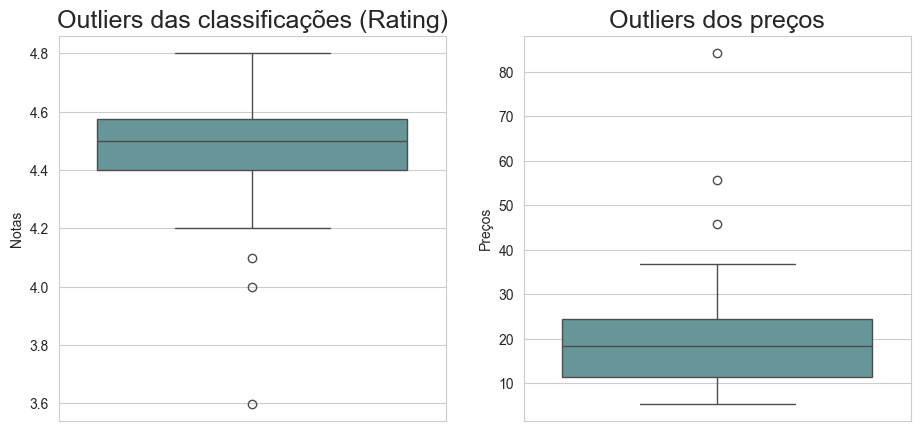

In [258]:
# Existem outliers nas classificações ou nos preços dos livros?

# Calcular o intervalo interquartil (IQR)
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites dos bigodes
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = data[(data['Rating'] < lower_limit) | (data['Rating'] > upper_limit)]

# Criando o gráfico de caixa

plt.figure(figsize=(11, 5))

plt.subplot(1,2,1)
ax = sns.boxplot(data=data['Rating'], showfliers=True, color='cadetblue')
ax.set_title('Outliers das classificações (Rating)', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Notas')

plt.subplot(1,2,2)
ax = sns.boxplot(data=data['Price_BRL'], showfliers=True, color='cadetblue')
ax.set_title('Outliers dos preços', fontsize=18)
ax.set_ylabel('Preços')

